# visualising 4d unit balls and calculating distances
writing norms is straighforward only tricky part on this project was visualising unit balls defined by $||x - x_r|| \leq 1$ where $x_r$ is a 4-vector. 

visualising unitball of 4vector we need 4d space for that I decide to show 3d slices of 4d dimensions. using slider as a way to move throug 4rth dimetion

In [1]:
# importing libraries
import numpy as np
import plotly.graph_objects as go

## I've chose 1norm and 2norm and respective induced norms
writing norms with numpy is prety straight forward

In [8]:
# -------- norms --------
def norm1(v):    return np.abs(v).sum()
def norm2(v):    return np.sqrt((v**2).sum())
    
def induced1(A):    return np.abs(A).sum(axis=0).max()
def induced2(A):
    return np.sqrt(np.linalg.eigvalsh(A.T @ A).max())


In [9]:
# 4 random vectors  / matrices
v1 = np.array([2, 1, 3, 4])
v2 = np.array([5, -2, 7, 0])
v3 = np.array([1, 8, -3, 6])
v4 = np.array([4, 4, 2, 9])
a1 = v1.reshape(2, 2)
a2 = v2.reshape(2, 2)
a3 = v3.reshape(2, 2)
a4 = v4.reshape(2, 2)

## calculating distances

In [10]:
# distance between vector1 and vector 2  
print(norm1(v1 - v2))
print(norm2(v1 - v2))

# distance between matrix1  and matrix2 2  
print(induced1(a1 -a2))
print(induced2(a1 -a2))

14
7.0710678118654755
7
7.0710678118654755


## Unit Ball visualisation
easiest way to get representation of unit ball for me was to create grid of sample ponts (cloud of points) and filter it with equation  $||x - x_r|| \leq 1$ 
for sake of saving time and space we only generate 3d grid and worht dimension would be set as current slice w

In [2]:
# -------- SAMPLE POINTS --------
res = 61
xs, ys, zs = np.mgrid[
    -1:1:complex(res),
    -1:1:complex(res),
    -1:1:complex(res)
]

In [3]:
def unitBall(vec ,norm,  matrix = False):
    frames = []
    steps = []

    if (matrix): vec = vec.reshape(4)
    pts3 = np.vstack((xs.ravel(), ys.ravel(), zs.ravel())).T + vec[:3]
    N = pts3.shape[0] 

    values = np.linspace(-1+ vec[3], 1 + vec[3], 21)


    for idx, w0 in enumerate(values):

        pts4 = np.column_stack([pts3, np.full(N, w0)]) #add 4th dimmention

        if (matrix) : x,y,z = ballSliceMatrix(pts4, vec, norm)
        else:  x,y,z = ballSliceVector(pts4,vec, norm)

        frame = go.Frame(
            data=[
                go.Scatter3d(
                    x=x, y=y, z=z,
                    mode='markers',
                    marker=dict(size=2)
                )
            ],
            name=str(idx)
        )

        frames.append(frame)
        steps.append(
            dict(
                method="animate",
                args=[
                    [str(idx)],
                    dict(
                        frame=dict(duration=0, redraw=True),
                        mode="immediate",
                        transition=dict(duration=0)
                    )
                ],
                label=f"{w0:.2f}"
            )
        )

    # -------- INITIAL FRAME --------
    w0 = values[0]
    pts4 = np.column_stack([pts3, np.full(N, values[0])])
    if (matrix) : x,y,z = ballSliceMatrix(pts4, vec, norm)
    else:  x,y,z = ballSliceVector(pts4,vec, norm)

    fig = go.Figure(
        data=[
            go.Scatter3d(
                x=x, y=y, z=z,
                mode='markers',
                marker=dict(size=2)
            )
        ],
        layout=go.Layout(
            sliders=[
                dict(
                    steps=steps,
                    currentvalue=dict(prefix="w = "),
                    pad=dict(t=50),
                    transition=dict(duration=0),
                )
            ],
            scene=dict(
                xaxis=dict(range=[-1 + vec[0], 1 + vec[0]]),
                yaxis=dict(range=[-1 + vec[1], 1 + vec[1]]),
                zaxis=dict(range=[-1 + vec[2], 1 + vec[2]]),
                aspectmode='cube'
            )
        ),
        frames=frames
    )
    fig.update_layout(
        width=1200,
        height=900
    )
    fig.show()

In [4]:
def ballSliceVector(pts4, vec,  norm):
    vals = np.apply_along_axis(norm, 1, (pts4-vec))  #maps points4d(pts4) to its distance from vector
    mask = (vals >0.96) & (vals <= 1) #boolean array that tells which of the points are in our unit ball

    pts_slice = pts4[:,:3][mask]
    return pts_slice[:,0], pts_slice[:,1], pts_slice[:,2]

In [5]:
def ballSliceMatrix(pts4, vec,  norm):
    diff = (pts4 - vec).reshape(-1, 2, 2)
    vals = np.array([norm(M) for M in diff])      #maps points4d(pts4) to its distance from vector
    mask = (vals >0.96) & (vals <= 1) #boolean array that tells which of the points are in our unit ball

    pts_slice = pts4[:,:3][mask]
    return (pts_slice[:,0], pts_slice[:,1], pts_slice[:,2])

In [15]:
unitBall(a1, induced2, matrix = True)

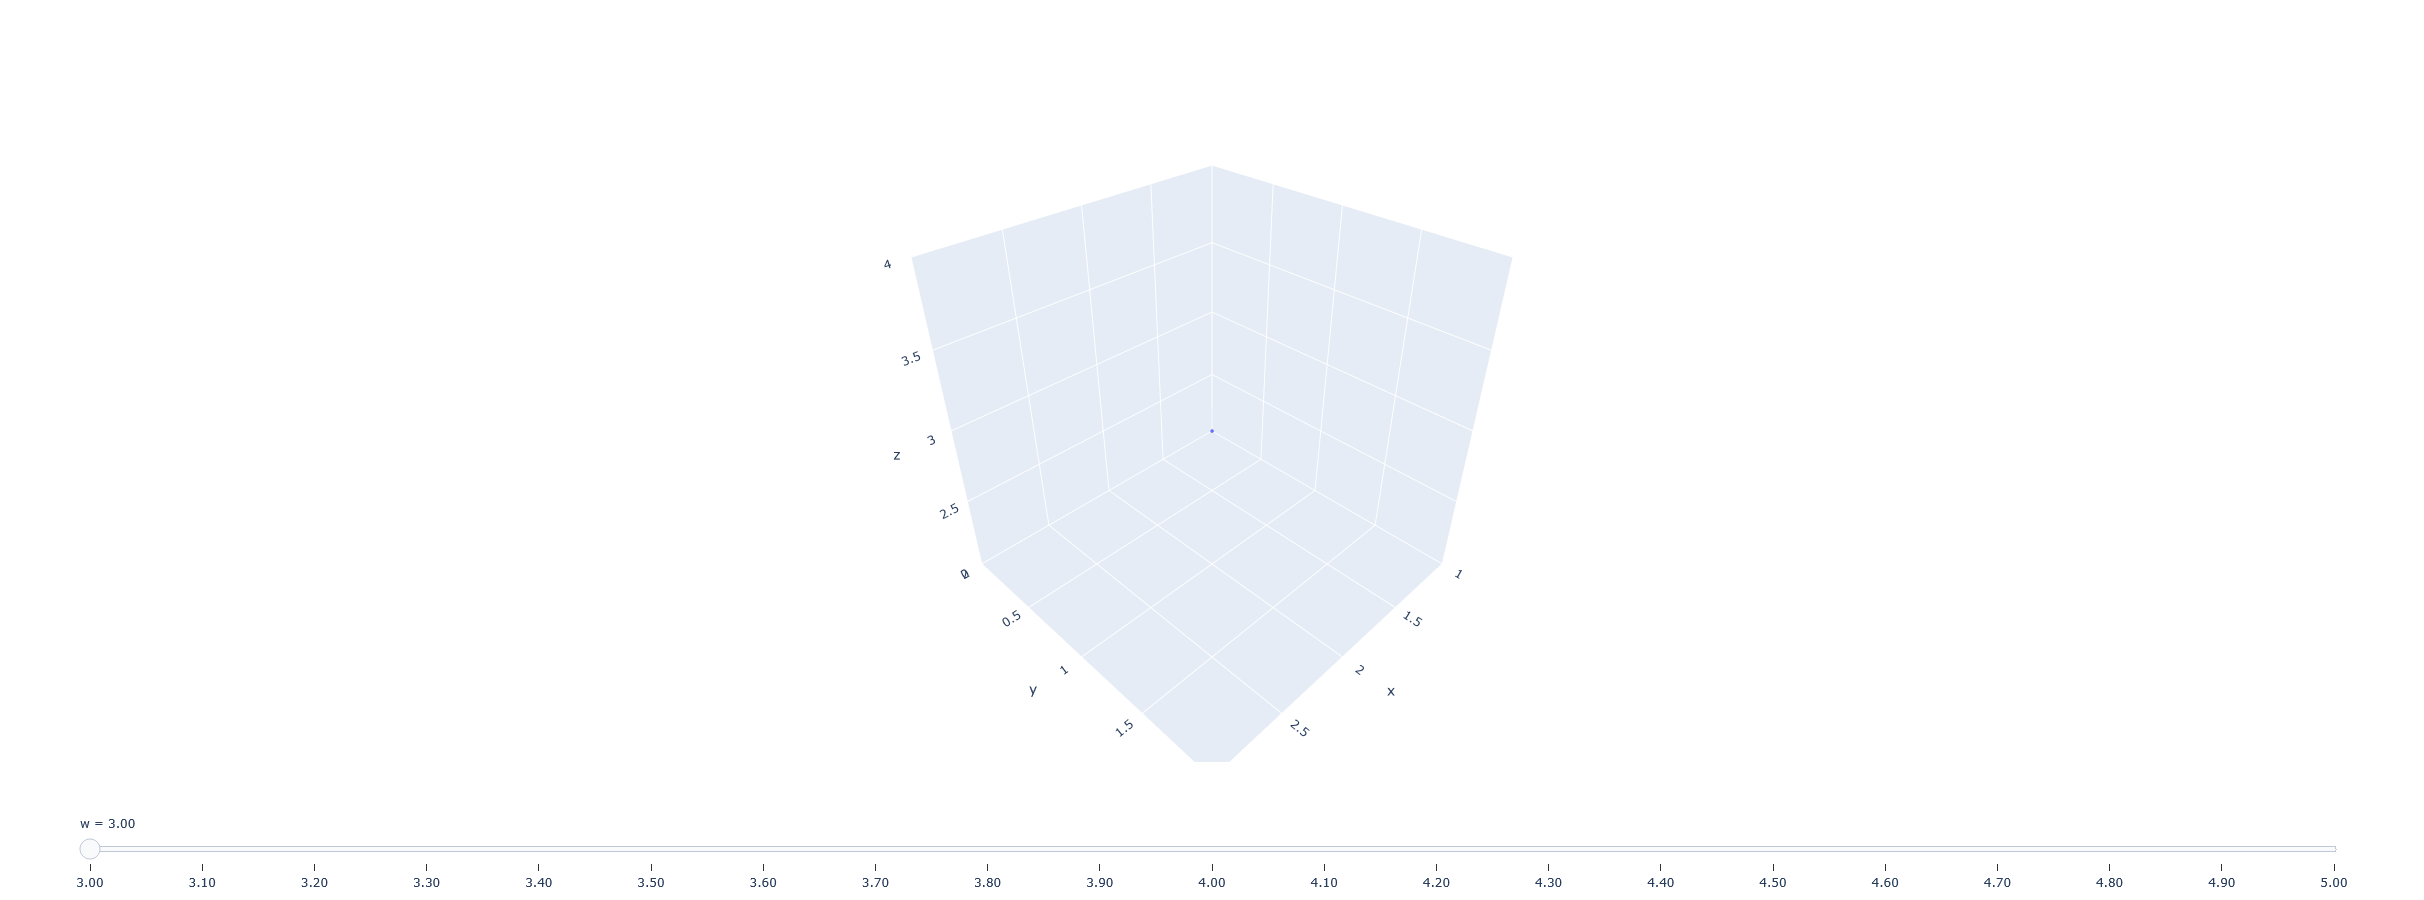

In [16]:
unitBall(v1, norm1)